## Cargando paquetes

In [47]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Configuraci√≥n de visualizaci√≥n
%matplotlib inline
plt.style.use('ggplot')
pd.set_option("display.max_columns", None)

##  Cargando la Data desde Repositorio


In [5]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
print("Path to dataset files:", path)

C:\Users\Pedro Yacila\OneDrive\Escritorio\python_1\PYTHON_DATA_ANALYTICS\DATA_3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8.56k/8.56k [00:00<00:00, 7.55MB/s]

Extracting files...
Path to dataset files: C:\Users\Pedro Yacila\.cache\kagglehub\datasets\fedesoriano\heart-failure-prediction\versions\1


## Verificando si la data se descargo

In [6]:
import os
os.listdir(path)

['heart.csv']

## Cargando la Data

In [48]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "heart.csv"))

print("Dataset cargado - Dimensiones:", df.shape)
print("\nPrimeras filas:")
df.head()


Dataset cargado - Dimensiones: (918, 12)

Primeras filas:


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## Analisis Exploratorio (R

In [23]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [55]:
print("\nInformaci√≥n del dataset:")
df.info()


Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
# Verificadno algunas de las Mediddas de Tendencia Central de la Data
df.describe()


Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [54]:
print("\nValores faltantes por columna:")
df.isna().sum()


Valores faltantes por columna:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [32]:
# Valores Nulos
Nan_count_col1 =df.isna().sum()
Nan_count_col1

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [33]:
df.shape

(918, 12)

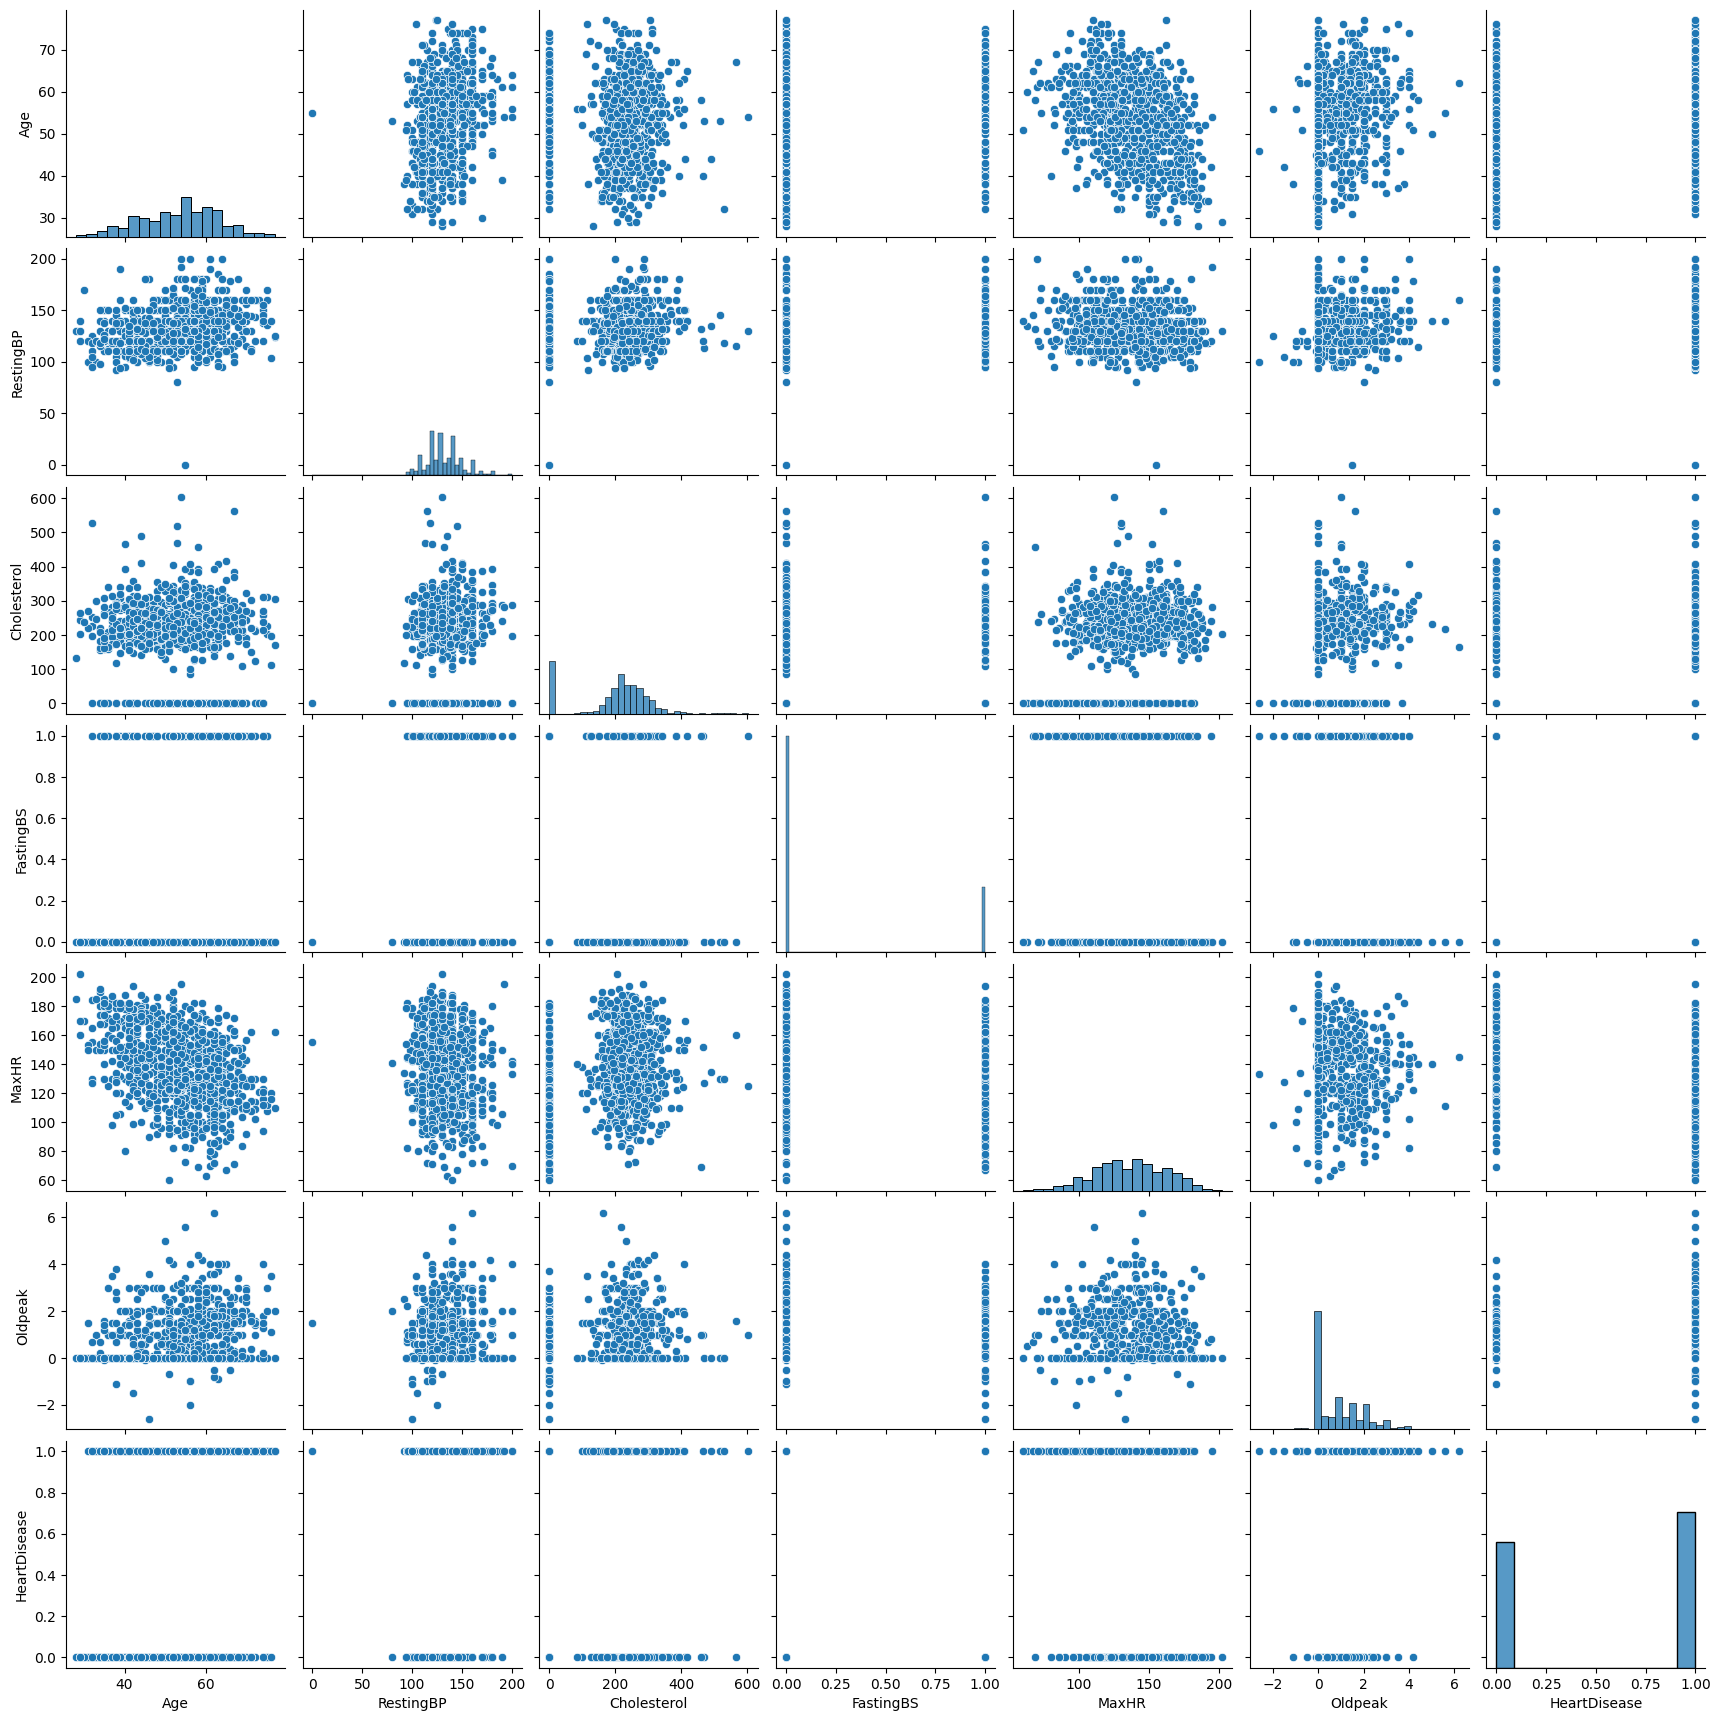

In [34]:
# Grafico de Dispersion
sns.pairplot(df)

### CONCLUSIONES DEL PAIRPLOT
1. Variables como Age, MaxHR y Oldpeak tienen variabilidad √∫til
   Age: distribuci√≥n normal, pero con mayor riesgo de enfermedad card√≠aca en mayores de 50‚Äì60 a√±os (ver correlaciones cruzadas).
   MaxHR: los pacientes con menor frecuencia card√≠aca m√°xima tienden a tener HeartDisease = 1.
   Oldpeak: valores m√°s altos est√°n relacionados con mayor riesgo (HeartDisease = 1).

2. Variables binarias como FastingBS o RestingECG aparecen discretizadas
   FastingBS y RestingECG solo tienen un par de niveles ‚Üí se ven como franjas horizontales o verticales.
    No aportan relaciones visuales fuertes con otras variables en este gr√°fico.

3. Cholesterol y RestingBP tienen outliers
   Se observan puntos aislados con valores muy altos en ambas.
   Pueden necesitar tratamiento (e.g., winsorizaci√≥n o transformaci√≥n log).

4. HeartDisease est√° bastante relacionado con varias variables
HeartDisease = 1 (presencia de enfermedad) parece tener alguna asociaci√≥n negativa con MaxHR y positiva con Oldpeak.
 Tambi√©n parece haber agrupamientos m√°s visibles en esas zonas.

In [53]:
print("\nValores √∫nicos por columna:")
df.nunique()


Valores √∫nicos por columna:


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


An√°lisis de la distribuci√≥n de la variable objetivo


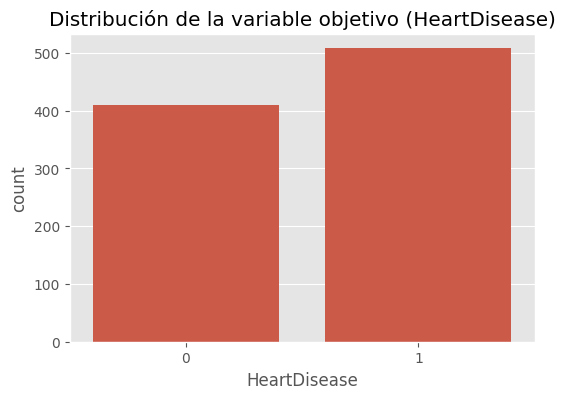

In [56]:
print("\nAn√°lisis de la distribuci√≥n de la variable objetivo")
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribuci√≥n de la variable objetivo (HeartDisease)')
plt.show()

#### üìå Conclusi√≥n:
La variable objetivo HeartDisease est√° ligeramente desbalanceada, con m√°s personas que s√≠ tienen enfermedad card√≠aca (clase 1) que las que no (clase 0).
Sin embargo, la diferencia no es extrema, por lo que no es necesario aplicar t√©cnicas de balanceo como SMOTE o undersampling.
Esto permite entrenar modelos de clasificaci√≥n sin preocuparse por un sesgo significativo debido al desbalance.

## Visualizaci√≥n de relaciones (opcional)

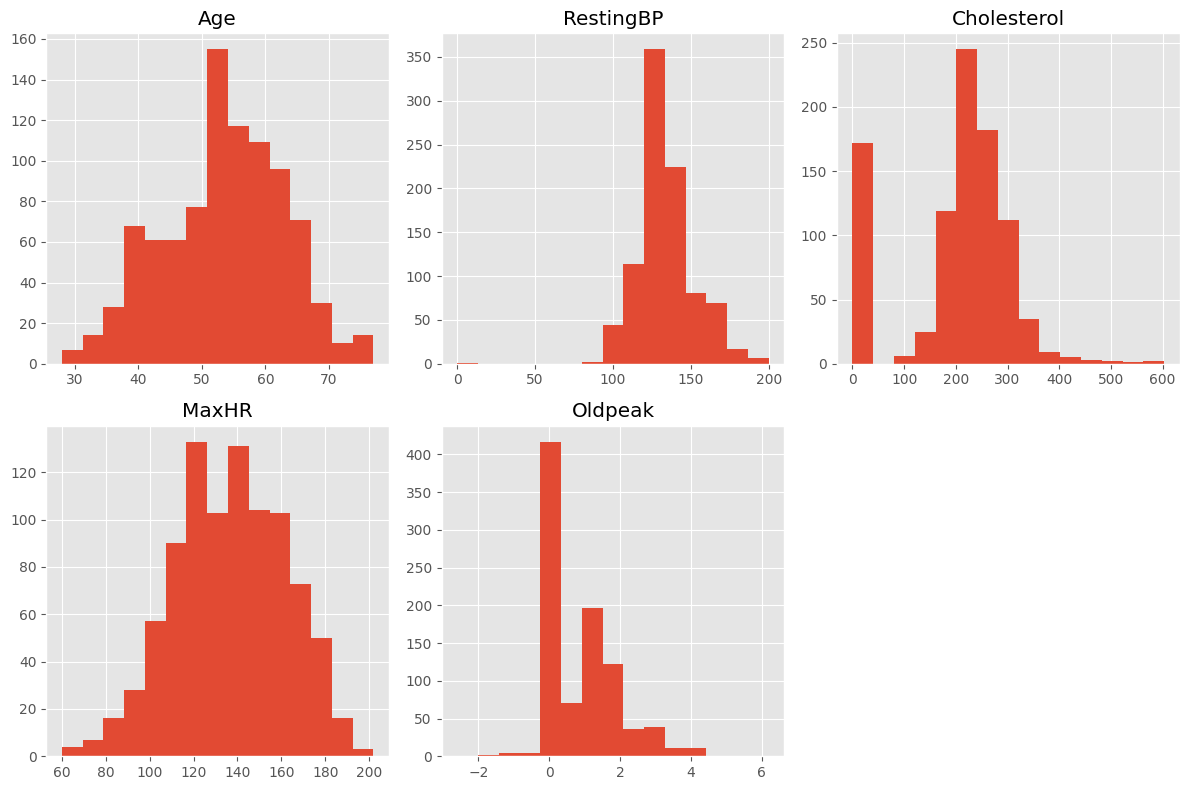

In [57]:
# Histogramas de caracter√≠sticas num√©ricas
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[num_cols].hist(bins=15, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()


#### üìå Conclusi√≥n:
1. Age: Distribuci√≥n aproximadamente normal con una concentraci√≥n entre los 40 y 60 a√±os, lo que   indica que la mayor√≠a de los pacientes son adultos de mediana edad o mayores.

2. RestingBP (presi√≥n arterial en reposo): Distribuci√≥n sesgada a la derecha. La mayor√≠a tiene   valores alrededor de 120 mmHg, pero hay algunos valores muy bajos o muy altos que podr√≠an ser  outliers.

3. Cholesterol: Distribuci√≥n tambi√©n sesgada a la derecha. Hay muchos pacientes con valores entre  200 y 300, pero tambi√©n hay valores cero o muy bajos que podr√≠an ser datos faltantes  codificados como 0 o simplemente no v√°lidos.

4. MaxHR (frecuencia card√≠aca m√°xima alcanzada): Distribuci√≥n bastante sim√©trica con mayor√≠a de  valores entre 100 y 170. Parece una variable bien distribuida.

5. Oldpeak (depresi√≥n del ST inducida por ejercicio): Distribuci√≥n fuertemente sesgada a la derecha. La mayor√≠a tiene valores cercanos a 0, pero hay un grupo menor con valores altos (hasta 6), lo cual indica una gran variabilidad en el riesgo.

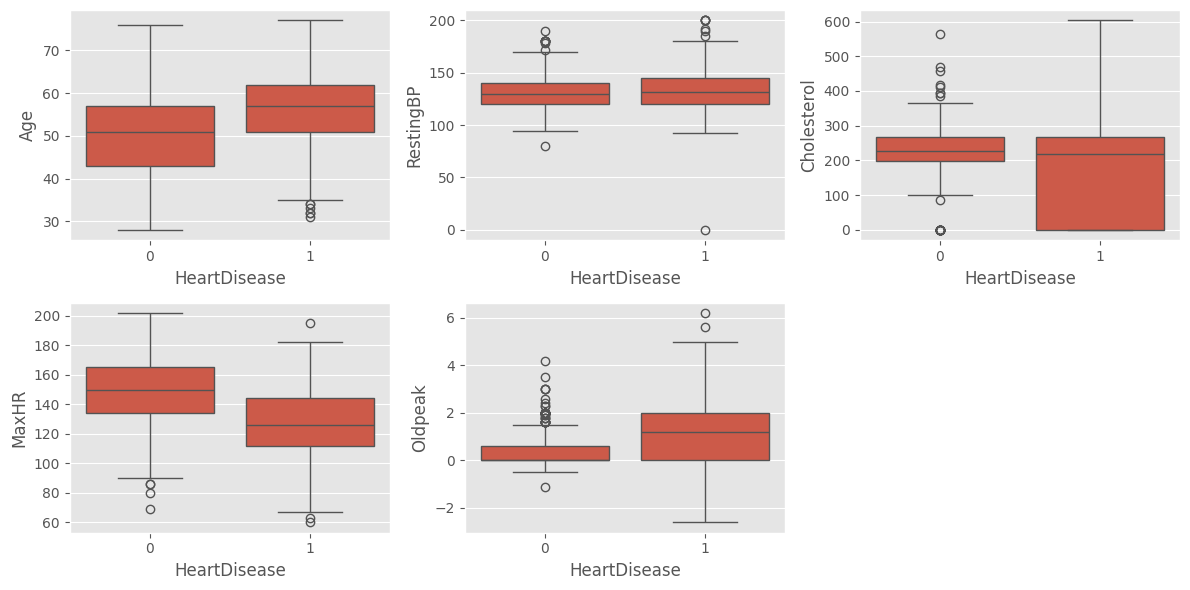

In [58]:
# Boxplots para ver distribuci√≥n por clase
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=col, data=df)
plt.tight_layout()
plt.show()

#### üìå Conclusi√≥n general resumida:
Edad alta, menor MaxHR y mayor Oldpeak se asocian con presencia de enfermedad card√≠aca.
RestingBP y Colesterol muestran diferencias menos marcadas o m√°s dispersas.

## Catagorizando las variables


In [59]:
# Definir caracter√≠sticas categ√≥ricas
cat_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]


In [60]:
# Codificaci√≥n one-hot para RandomForest y XGBoost
df_encoded = pd.get_dummies(df, columns=cat_features, prefix=cat_features, drop_first=True)

In [39]:
df.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...               True             False   
2  False   True              False  ...              False             False   
3   True  False               True  ...              False             False   
4  False   True              False  ...               True             False   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0           False               True          False              True   
1           False               True          False              True   
2           False              False           True              True   
3           False               True          False             False   
4           False               True          False              True   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0             False          False          False         True  
1             False          False           True        False  
2             False          False          False         True  
3              True          False           True        False  
4             False          False          False         True  

[5 rows x 21 columns]

###  Divisi√≥n en train/val/test (60/20/20)


In [62]:
X_temp, X_test_enc, y_temp, y_test = train_test_split(
    X_enc, y, test_size=0.20, random_state=42, stratify=y
)
X_train_enc, X_val_enc, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Estandarizaci√≥n de caracter√≠sticas num√©ricas
num_cols = [c for c in X_train_enc.columns if c.startswith(tuple(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']))]
scaler = StandardScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_val_enc[num_cols] = scaler.transform(X_val_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])

print("\nPreprocesamiento completado:")
print(f"Train shape: {X_train_enc.shape}, Val shape: {X_val_enc.shape}, Test shape: {X_test_enc.shape}")


Preprocesamiento completado:
Train shape: (550, 15), Val shape: (184, 15), Test shape: (184, 15)


#### üìå En resumen, este bloque de c√≥digo hace:
‚úîÔ∏è Divide tus datos en train (60%), validation (20%), test (20%)
‚úîÔ∏è Asegura la misma proporci√≥n de clases en cada partici√≥n
‚úîÔ∏è Estandariza las variables num√©ricas (Age, RestingBP, etc.)

## Modelo 1 - Random Forest con GridSearch

In [63]:
# Configuraci√≥n de GridSearch
rf_param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [None, 8, 16],
    "min_samples_split": [2, 10],
}

rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, rf_param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
gs.fit(X_train_enc, y_train)

# Mejor modelo
rf_best = gs.best_estimator_
print("\n[Random Forest] Mejores par√°metros encontrados:")
print(gs.best_params_)

# Evaluaci√≥n r√°pida en validaci√≥n
y_pred_val = rf_best.predict(X_val_enc)
print("\nExactitud en validaci√≥n:", accuracy_score(y_val, y_pred_val))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

[Random Forest] Mejores par√°metros encontrados:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}

Exactitud en validaci√≥n: 0.8369565217391305


Se probaron 12 combinaciones de par√°metros con validaci√≥n cruzada (5-fold) y se encontr√≥ que la mejor fue usar 300 √°rboles, sin limitar su profundidad, y dividiendo nodos solo si hay al menos 10 muestras.

Con esos par√°metros, el modelo alcanz√≥ un 83.7% de precisi√≥n en la validaci√≥n.

## Modelo 2 - CatBoost

In [64]:
# Preparaci√≥n de datos para CatBoost (sin one-hot encoding)
X_cb = df.drop("HeartDisease", axis=1)
y_cb = df["HeartDisease"]

# Divisi√≥n train/test (manteniendo mismos √≠ndices para comparaci√≥n justa)
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X_cb, y_cb, test_size=0.20, random_state=42, stratify=y_cb
)
X_train_cb, X_val_cb, y_train_cb, y_val_cb = train_test_split(
    X_train_cb, y_train_cb, test_size=0.25, random_state=42, stratify=y_train_cb
)

# Entrenamiento de CatBoost
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric="AUC",
    verbose=100,
    random_state=42,
    early_stopping_rounds=50
)

cat_model.fit(
    X_train_cb,
    y_train_cb,
    cat_features=cat_features,
    eval_set=(X_val_cb, y_val_cb),
    use_best_model=True,
)

# Evaluaci√≥n r√°pida en validaci√≥n
y_pred_val_cb = cat_model.predict(X_val_cb)
print("\nExactitud en validaci√≥n (CatBoost):", accuracy_score(y_val_cb, y_pred_val_cb))

0:	test: 0.8567073	best: 0.8567073 (0)	total: 175ms	remaining: 2m 55s
100:	test: 0.9111669	best: 0.9118843 (67)	total: 3.03s	remaining: 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9141559063
bestIteration = 145

Shrink model to first 146 iterations.

Exactitud en validaci√≥n (CatBoost): 0.8369565217391305


#### üß≠ Conclusi√≥n general:
Aunque el AUC fue alto (91.4%), el accuracy final en validaci√≥n fue 83.7%.

- Esto significa que el modelo es bueno para separar clases (AUC alto), pero en t√©rminos de predicciones correctas (accuracy) est√° alineado con tu Random Forest.

- Podr√≠as comparar otras m√©tricas (F1, Recall) para ver diferencias m√°s finas.

## Modelo 3 - XGBoost

In [65]:
# Entrenamiento de XGBoost
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    early_stopping_rounds=50
)

xgb_model.fit(
    X_train_enc,
    y_train,
    eval_set=[(X_val_enc, y_val)],
    verbose=50,
)

# Evaluaci√≥n r√°pida en validaci√≥n
y_pred_val_xgb = xgb_model.predict(X_val_enc)
print("\nExactitud en validaci√≥n (XGBoost):", accuracy_score(y_val, y_pred_val_xgb))

[0]	validation_0-auc:0.83961
[50]	validation_0-auc:0.90005
[100]	validation_0-auc:0.89993
[149]	validation_0-auc:0.89634

Exactitud en validaci√≥n (XGBoost): 0.842391304347826


#### üß≠ Conclusi√≥n s√∫per resumida:
XGBoost rindi√≥ ligeramente mejor en validaci√≥n que Random Forest y CatBoost en tu experimento.
- AUC alto (~90%) indica muy buena capacidad de discriminaci√≥n.
- Accuracy (~84.2%) confirma que su rendimiento en predicci√≥n es consistente y un poco mejor que tus otros modelos.
- Hay se√±ales de ligero sobreajuste (AUC se empieza a estancar y bajar en las √∫ltimas iteraciones), por lo que podr√≠as aplicar early stopping para frenarlo antes.

## Evaluaci√≥n comparativa

In [66]:
def evaluate(model, X_t, y_t, name: str, is_catboost=False):
    if is_catboost:
        y_pred = model.predict(X_t)
        y_prob = model.predict_proba(X_t)[:, 1]
    else:
        y_pred = model.predict(X_t)
        y_prob = model.predict_proba(X_t)[:, 1]

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_t, y_pred),
        "ROC_AUC": roc_auc_score(y_t, y_prob),
        "F1": f1_score(y_t, y_pred),
    }

results = []

# Evaluaci√≥n en conjunto de test
results.append(evaluate(rf_best, X_test_enc, y_test, "RandomForest"))
results.append(evaluate(cat_model, X_test_cb, y_test_cb, "CatBoost", is_catboost=True))
results.append(evaluate(xgb_model, X_test_enc, y_test, "XGBoost"))

results_df = pd.DataFrame(results).set_index("Model").sort_values("ROC_AUC", ascending=False)
print("\n=== Comparaci√≥n de modelos en Test ===")
display(results_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'ROC_AUC', 'F1']))


=== Comparaci√≥n de modelos en Test ===


#### üì£ CONCLUSI√ìN GENERAL :
CatBoost es el mejor modelo de los tres.

- Tiene la mayor Accuracy (90.2%), indicando que predice bien en general.

- Tiene el mayor ROC_AUC (~0.929) ‚Üí el mejor separando positivos de negativos.

- Tiene el mayor F1 (0.913) ‚Üí el mejor balance entre precision y recall, muy importante si las clases est√°n desbalanceadas.

En esta comparaci√≥n, CatBoost mostr√≥ el mejor desempe√±o general con mayor exactitud (90.2%), capacidad de discriminaci√≥n (AUC 0.929) y balance entre precisi√≥n y recall (F1 0.913). XGBoost tambi√©n obtuvo m√©tricas altas pero consistentemente un poco menores, mientras que Random Forest fue el m√°s bajo de los tres. Por ello, CatBoost es la opci√≥n recomendada para este problem


## Guardar del mejor modelo

In [67]:
best_model_name = results_df['ROC_AUC'].idxmax()
print(f"\nMejor modelo seg√∫n ROC_AUC: {best_model_name}")

if best_model_name == "RandomForest":
    import joblib
    joblib.dump(rf_best, "best_model_rf.pkl")
    print("Modelo RandomForest guardado como 'best_model_rf.pkl'")
elif best_model_name == "CatBoost":
    cat_model.save_model("best_model_catboost.cbm")
    print("Modelo CatBoost guardado como 'best_model_catboost.cbm'")
else:
    xgb_model.save_model("best_model_xgb.json")
    print("Modelo XGBoost guardado como 'best_model_xgb.json'")


Mejor modelo seg√∫n ROC_AUC: CatBoost
Modelo CatBoost guardado como 'best_model_catboost.cbm'


## Visualizaci√≥n de importancia de caracter√≠sticas

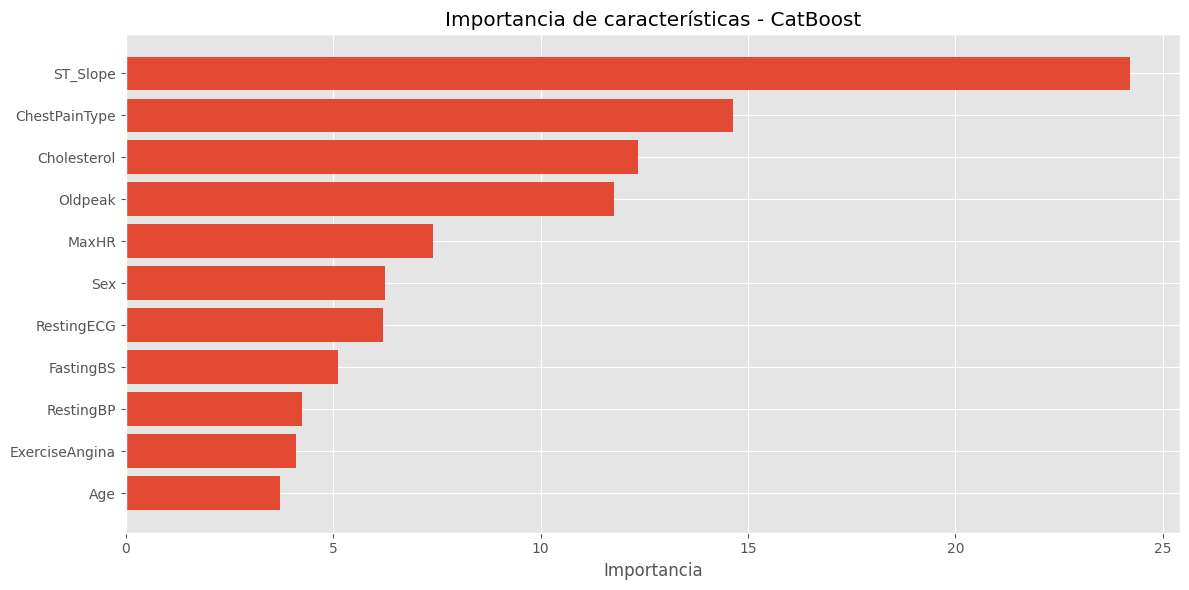

In [68]:
plt.figure(figsize=(12, 6))

if best_model_name == "RandomForest":
    importances = rf_best.feature_importances_
    features = X_train_enc.columns
elif best_model_name == "CatBoost":
    importances = cat_model.get_feature_importance()
    features = X_train_cb.columns
else:
    importances = xgb_model.feature_importances_
    features = X_train_enc.columns

sorted_idx = np.argsort(importances)[-15:]  # Top 15 caracter√≠sticas
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title(f'Importancia de caracter√≠sticas - {best_model_name}')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

#### üìå Interpretaci√≥n resumida en texto formal:

El an√°lisis de importancia de caracter√≠sticas en el modelo CatBoost revela que las variables m√°s predictivas de enfermedad card√≠aca son ST_Slope, ChestPainType, Cholesterol, Oldpeak y MaxHR. Estas variables tienen relevancia cl√≠nica directa, pues est√°n asociadas con indicadores electrocardiogr√°ficos, s√≠ntomas de dolor tor√°cico y factores de riesgo metab√≥lico. El resultado valida la capacidad del modelo para identificar patrones m√©dicos relevantes y respalda su utilidad para apoyar el diagn√≥stico.